# Data Loading and Basic Visualization Guide

## 1. Setup and Data Loading
The first step in any data analysis pipeline is setting up the environment. This involves:
* **Importing Libraries:** Loading tools for data manipulation (like Pandas) and visualization (like Matplotlib/Seaborn).
* **Loading the Dataset:** Reading the data file (usually CSV or Excel) into a tabular format known as a DataFrame.
* **Verification:** Printing a success message to ensure the file path was correct and the data loaded without errors.

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('loan-train.csv')
test = pd.read_csv('loan-test.csv')
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
182,LP001636,Male,Yes,0,Graduate,No,4600,0.0,73.0,180.0,1.0,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
397,LP002281,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,1.0,Urban,Y
154,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y


## 3. Visualizing Distributions (Univariate Analysis)
To understand specific features, we look at them one by one.
* **Histograms:** These are used to view the frequency distribution of numerical variables. They help us answer:
    * Is the data centered?
    * Is it skewed to the left or right?
    * Are there multiple peaks (modes)?

C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\1033907341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=train, palette='pastel')


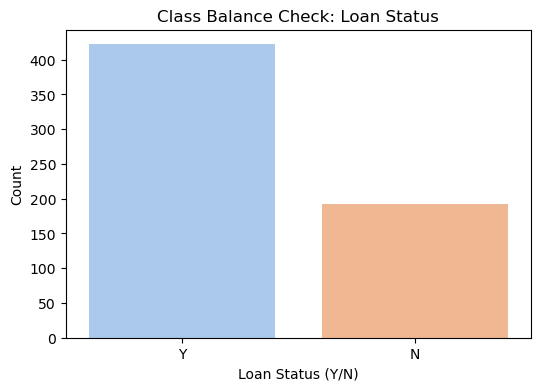

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
counts = train['Loan_Status'].value_counts()
percentage = train['Loan_Status'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train, palette='pastel')
plt.title("Class Balance Check: Loan Status")
plt.xlabel("Loan Status (Y/N)")
plt.ylabel("Count")
plt.show()

Shape:
(614, 13)

Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Missing Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Statistical Summary:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342

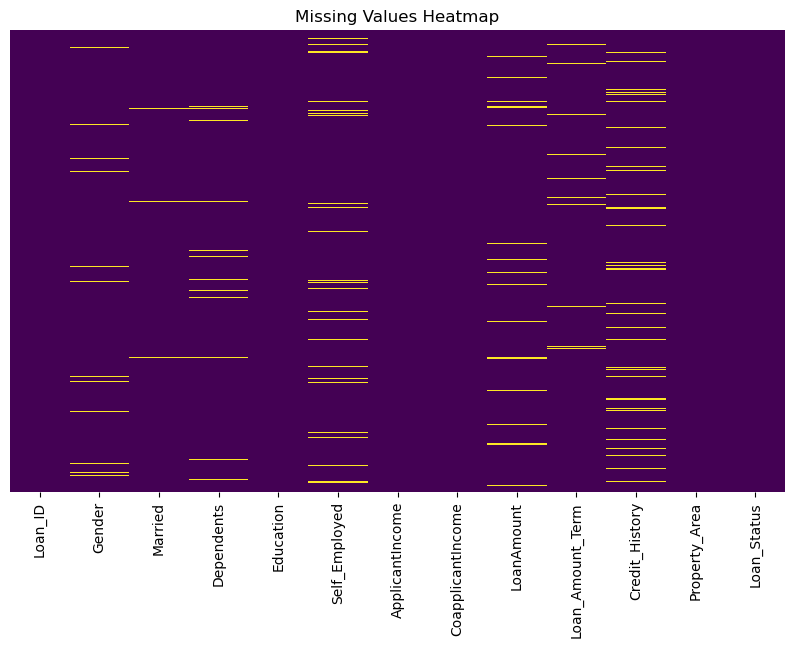

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Shape:")
print(train.shape)

print("\nData Types:")
print(train.dtypes)

print("\nMissing Values:")
print(train.isnull().sum())

print("\nStatistical Summary:")
print(train.describe())

print("\nDuplicates:")
print(train.duplicated().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

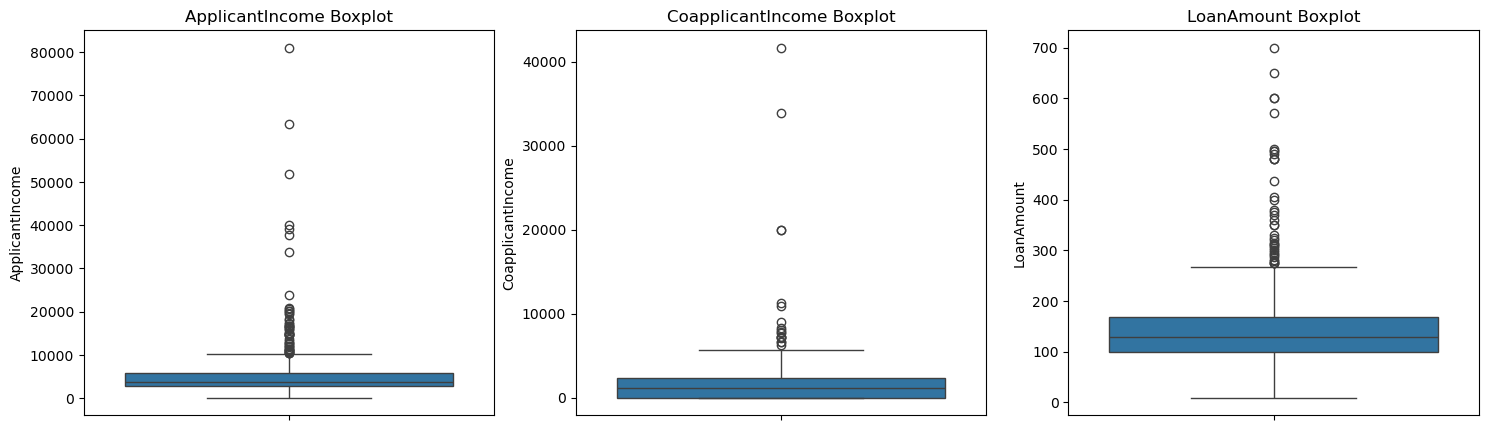

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y='ApplicantIncome', data=train, ax=axes[0])
axes[0].set_title('ApplicantIncome Boxplot')
sns.boxplot(y='CoapplicantIncome', data=train, ax=axes[1])
axes[1].set_title('CoapplicantIncome Boxplot')
sns.boxplot(y='LoanAmount', data=train, ax=axes[2])
axes[2].set_title('LoanAmount Boxplot')
plt.show()

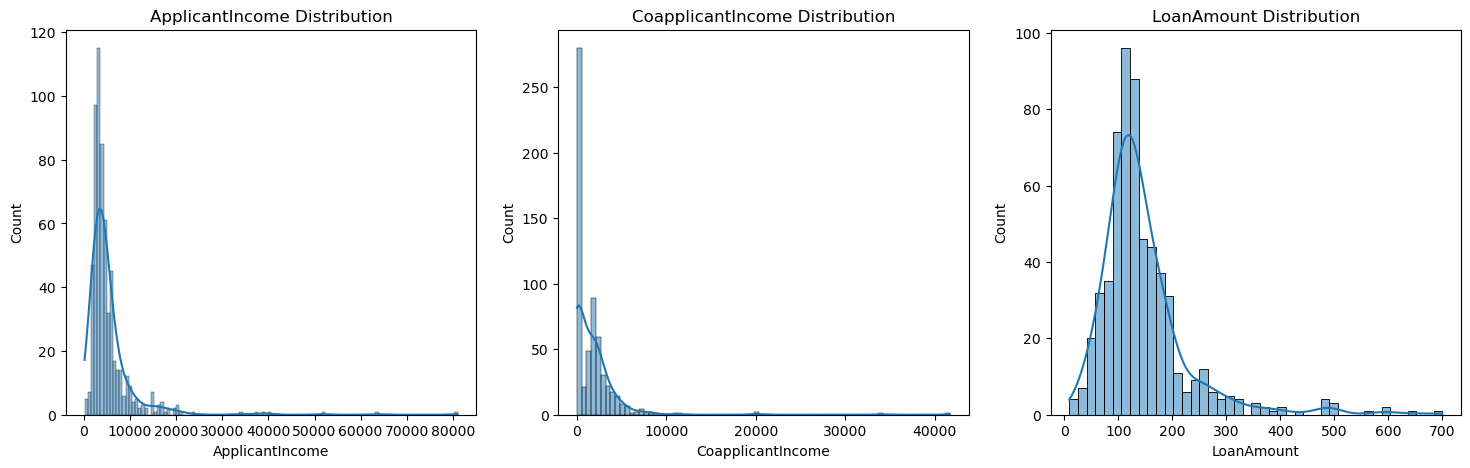

In [248]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(train['ApplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('ApplicantIncome Distribution')
sns.histplot(train['CoapplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('CoapplicantIncome Distribution')
sns.histplot(train['LoanAmount'], kde=True, ax=axes[2])
axes[2].set_title('LoanAmount Distribution')
plt.show()

## 5. Analyzing Correlations (Bivariate Analysis)
We often need to understand how two variables change in relation to each other.
* **Correlation Heatmap:** This is a color-coded matrix that shows the strength of relationships.
    * **Positive Correlation:** As A increases, B increases (e.g., Height and Weight).
    * **Negative Correlation:** As A increases, B decreases (e.g., Price and Sales).
    * **Zero Correlation:** No meaningful relationship.

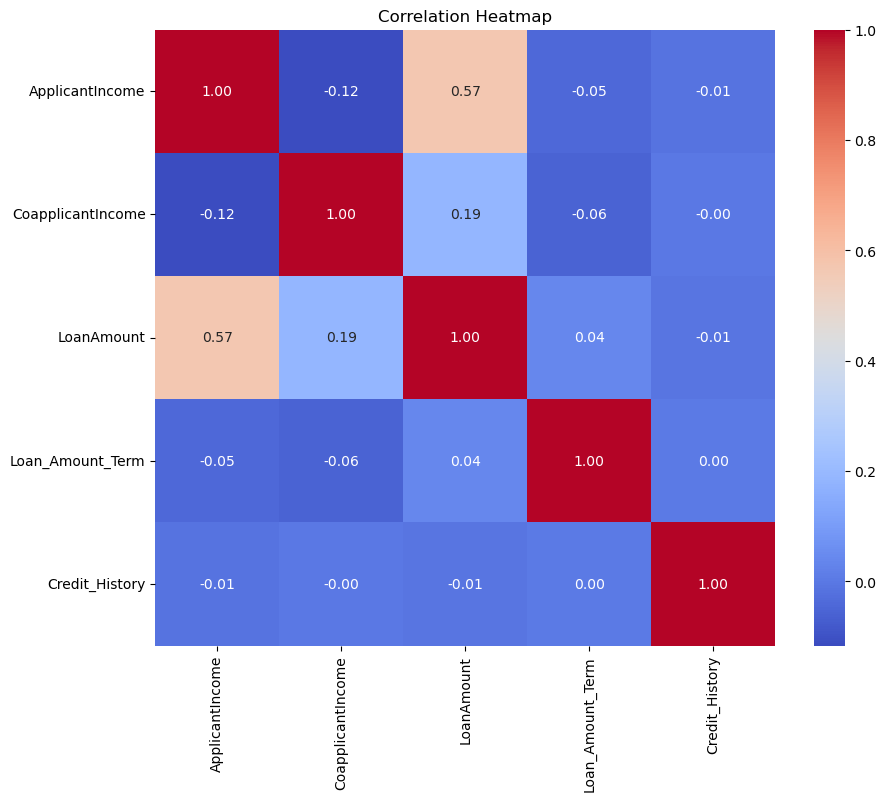

In [249]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 6. Pairwise Relationships
* **Pair Plots:** This technique creates a grid of scatter plots for every possible pair of numerical variables. It provides a holistic view of the dataset, revealing clusters, linear relationships, or complex patterns across multiple dimensions simultaneously.

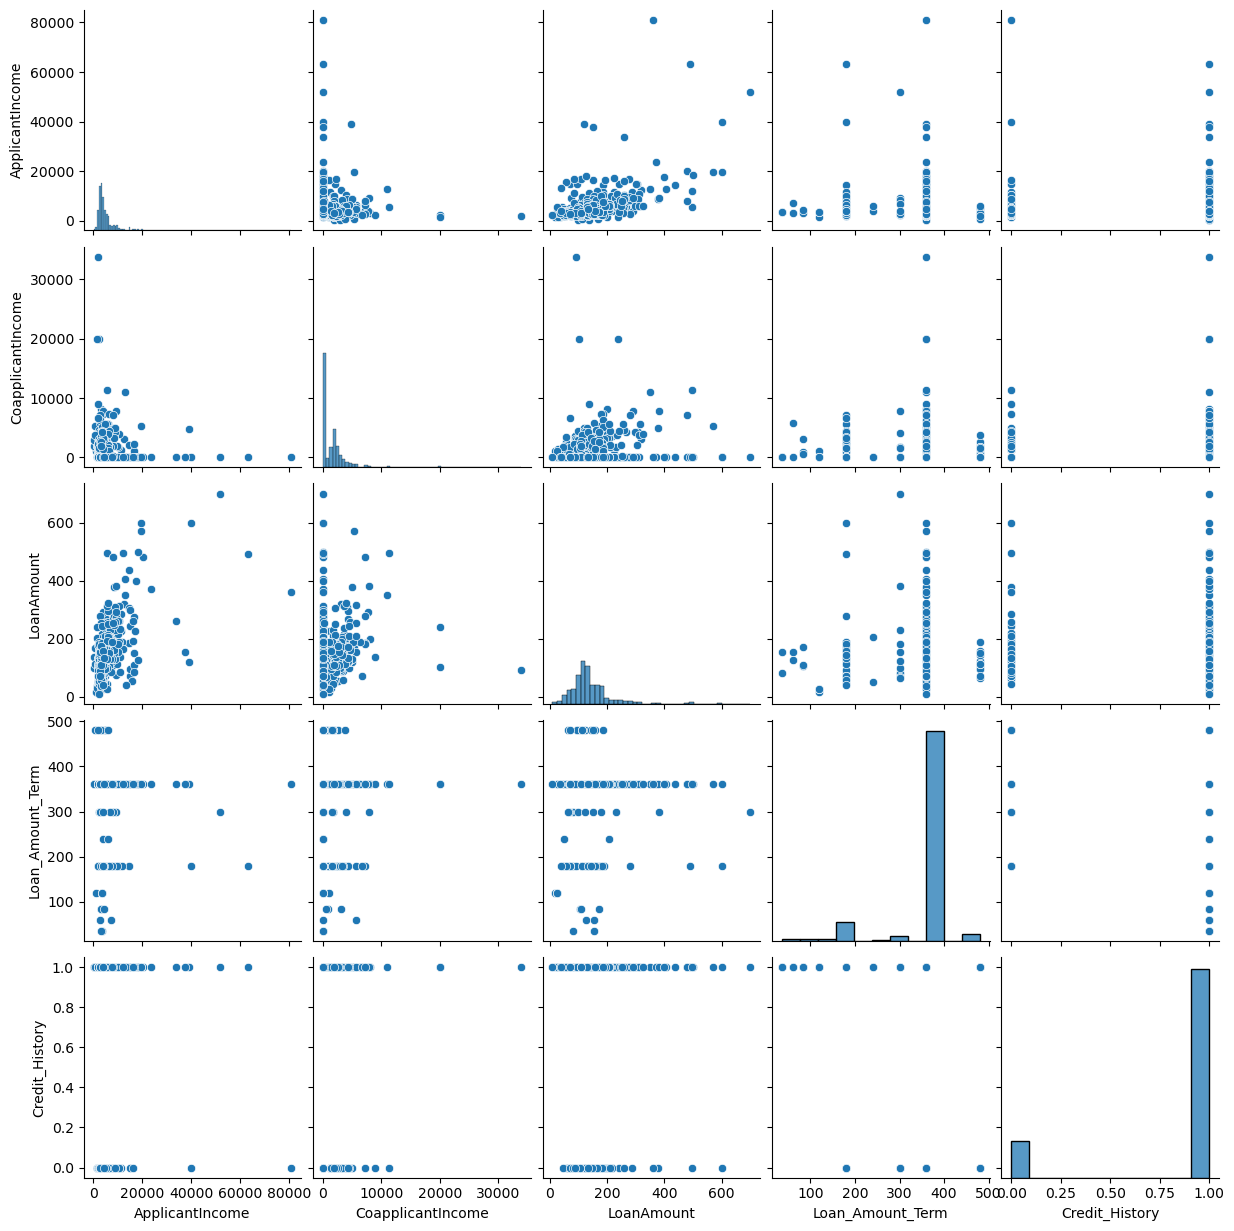

In [250]:
sns.pairplot(train.select_dtypes(include=['number']).dropna())
plt.show()

# Handling Missing Values

## 1. Detection and Visualization
Before cleaning the data, it is essential to identify where the gaps are.
* **Null Count Analysis:** We calculate the percentage of missing data for each column to decide whether to drop or fill them.
* **Missing Value Heatmap:** Visualizing null values helps identify patterns. For example, if multiple columns are missing data for the same specific rows, it might indicate a systematic error in data collection.

In [251]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [252]:
def handle_missing_train(df):
   
    df_clean = df.copy() 
    
    for col in df_clean.columns:
        miss = df_clean[col].isnull().sum()
        
        if miss > 0 and miss <= 5:
            df_clean.dropna(subset=[col], inplace=True)
            
        elif miss > 5:
            if df_clean[col].dtype == 'object':
                mode_val = df_clean[col].mode()[0]
                df_clean[col] = df_clean[col].fillna(mode_val)
            else:
                mean_val = df_clean[col].mean()
                df_clean[col] = df_clean[col].fillna(mean_val)
                
    return df_clean


train = handle_missing_train(train)

print("Missing values after cleaning:", train.isnull().sum().sum())
print("New Shape:", train.shape)

Missing values after cleaning: 0
New Shape: (611, 13)


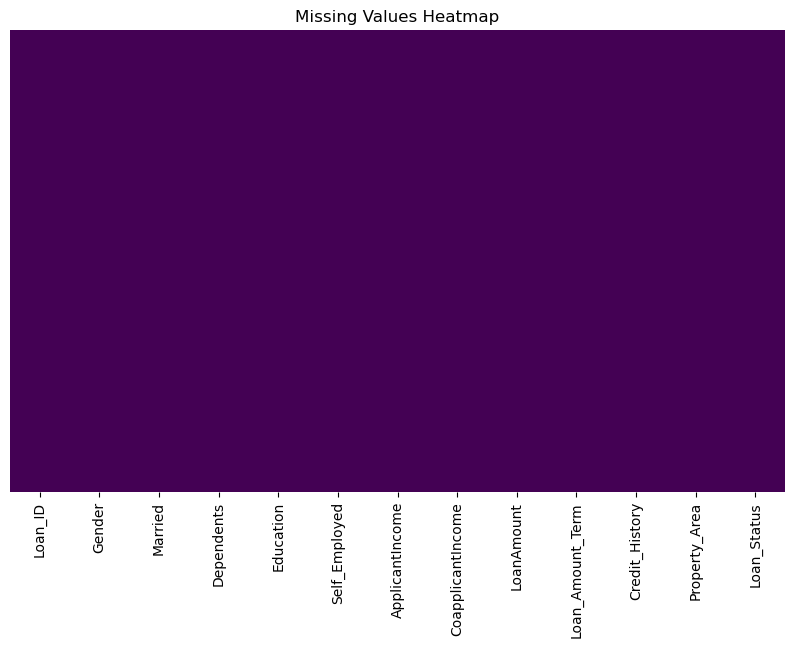

In [253]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 4. Detecting Outliers
Outliers are extreme values that differ significantly from other observations.
* **Boxplots:** We use boxplots to visualize the spread of the data.
    * The "box" represents the middle 50% of the data.
    * The "whiskers" show the range.
    * Points outside the whiskers are potential outliers that may need to be cleaned or investigated.

In [254]:
#capping of outliers

In [255]:
import numpy as np
import pandas as pd

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    df[col] = np.where(df[col] > upper_limit, upper_limit,
              np.where(df[col] < lower_limit, lower_limit, df[col]))
    return df

cols_to_cap = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in cols_to_cap:
    train_binned = cap_outliers(train_binned, col)

Cleaned Shape: (548, 13)


C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\1656682530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='ApplicantIncome', data=train_cleaned, palette='Greens')
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\1656682530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='CoapplicantIncome', data=train_cleaned, palette='Greens')


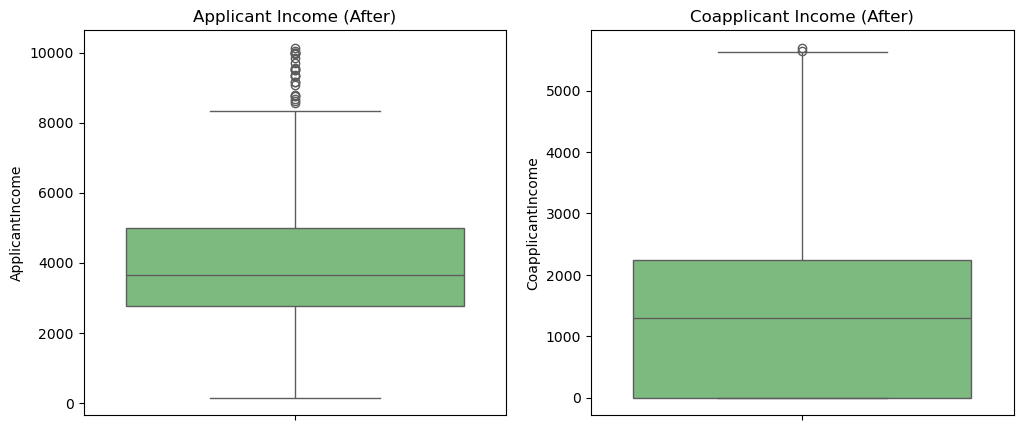

In [256]:
print("Cleaned Shape:", train_cleaned.shape)

# Visualize After
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='ApplicantIncome', data=train_cleaned, palette='Greens')
plt.title('Applicant Income (After)')

plt.subplot(1, 2, 2)
sns.boxplot(y='CoapplicantIncome', data=train_cleaned, palette='Greens')
plt.title('Coapplicant Income (After)')
plt.show()

# Feature Engineering and Preprocessing

## 1. Feature Segmentation
To apply appropriate transformations, the dataset features are segregated into two distinct groups based on their data type:
* **Numerical Features:** Quantitative variables including `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount`.
* **Categorical Features:** Qualitative variables such as `Gender`, `Married`, `Education`, `Credit_History`, and `Loan_Amount_Term_Bin`.

## 2. Transformation Pipelines
We construct specific processing pipelines for each feature type to ensure data compatibility with machine learning algorithms.

### Numerical Pipeline (Standardization)
* **Technique:** `StandardScaler`
* **Logic:** We standardize features by removing the mean and scaling to unit variance.
* **Purpose:** This ensures that features with larger magnitudes (like *Income*) do not dominate the objective function of the model compared to features with smaller magnitudes.



[Image of standard scaler distribution plot]


### Categorical Pipeline (Ordinal Encoding)
* **Technique:** `OrdinalEncoder`
* **Logic:** Categorical text labels are converted into integer codes (e.g., 0, 1, 2).
* **Handling Unknowns:** The encoder is robustly configured (`handle_unknown='use_encoded_value'`) to assign a default value of `-1` if it encounters unseen categories during future inference, preventing model crashes.

## 3. Integration and Output
* **Column Transformer:** A unified transformer applies the respective pipelines to the numerical and categorical columns simultaneously while dropping any unused columns.
* **Data Reconstruction:** The resulting transformed array is converted back into a Pandas DataFrame (`df_processed`), preserving the original column names for interpretability.

In [257]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term_Bin', 'Credit_History']

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
], remainder='drop')

X_processed = preprocessor.fit_transform(train_binned)

new_columns = num_cols + cat_cols
df_processed = pd.DataFrame(X_processed, columns=new_columns)


In [258]:
df_processed.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Amount_Term_Bin,Credit_History
197,-1.372100,0.898291,-0.164697,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
126,2.423606,-1.107783,2.274138,1.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0
428,-0.624062,-0.374384,-0.901544,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
81,-0.972068,-1.107783,-0.001494,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
474,0.497992,1.072704,0.524730,1.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0
593,-0.134456,0.984284,0.221837,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
373,-0.540684,0.853343,-0.343537,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
250,-1.607173,1.026745,1.021086,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0
228,0.233302,-1.107783,0.467240,1.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0
375,0.254944,0.655505,-0.164697,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0


In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

X = df_processed
y = train_binned['Loan_Status'].map({'Y': 1, 'N': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")

Logistic Regression: 0.7886
Random Forest: 0.7561
Gradient Boosting: 0.7561
SVM: 0.7967
KNN: 0.6911
Decision Tree: 0.7317
Naive Bayes: 0.7561

Best Model: SVM with Accuracy: 0.7967


In [260]:
#Imports metrics (Recall, F2 Score, ROC-AUC)

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, fbeta_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve, brier_score_loss
)
from sklearn.calibration import calibration_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

def evaluate_performance(model, X_test, y_test, X_train, y_train, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    
    print(f"--- {model_name} Performance ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F2 Score:  {f2:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"PR-AUC:    {pr_auc:.4f}")
    
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
    cv_f2 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro').mean() 
    print(f"CV Avg Recall: {cv_recall:.4f}")
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('Actual')
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[0, 1].plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    axes[0, 1].plot([0, 1], [0, 1], 'k--')
    axes[0, 1].set_title('ROC Curve')
    axes[0, 1].legend()
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    axes[1, 0].plot(recall_curve, precision_curve, label=f"PR-AUC={pr_auc:.2f}")
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].legend()
    
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    axes[1, 1].plot(prob_pred, prob_true, marker='o', label='Model')
    axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
    axes[1, 1].set_title('Calibration Curve')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, 
              np.where(df[col] < lower, lower, df[col]))
    return df

In [262]:
 #after feature engineering

In [263]:
#adding columns ( income) and loan terms per year

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, roc_auc_score

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return df

try:
    train = pd.read_csv('loan-train.csv')
except:
    train = pd.read_csv('train.csv')

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Loan_Term_Years'] = train['Loan_Amount_Term'] / 12

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    train[col] = train[col].fillna(train[col].mode()[0])
for col in ['Total_Income', 'LoanAmount', 'Loan_Term_Years']:
    train[col] = train[col].fillna(train[col].median())

for col in ['Total_Income', 'LoanAmount']:
    train = cap_outliers(train, col)

X = train.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = ['Total_Income', 'LoanAmount', 'Loan_Term_Years']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

--- New Model (With Feature Eng) Performance ---
Accuracy:  0.7805
Recall:    0.8588
F2 Score:  0.8528
ROC-AUC:   0.8217
PR-AUC:    0.8801
CV Avg Recall: 0.9051


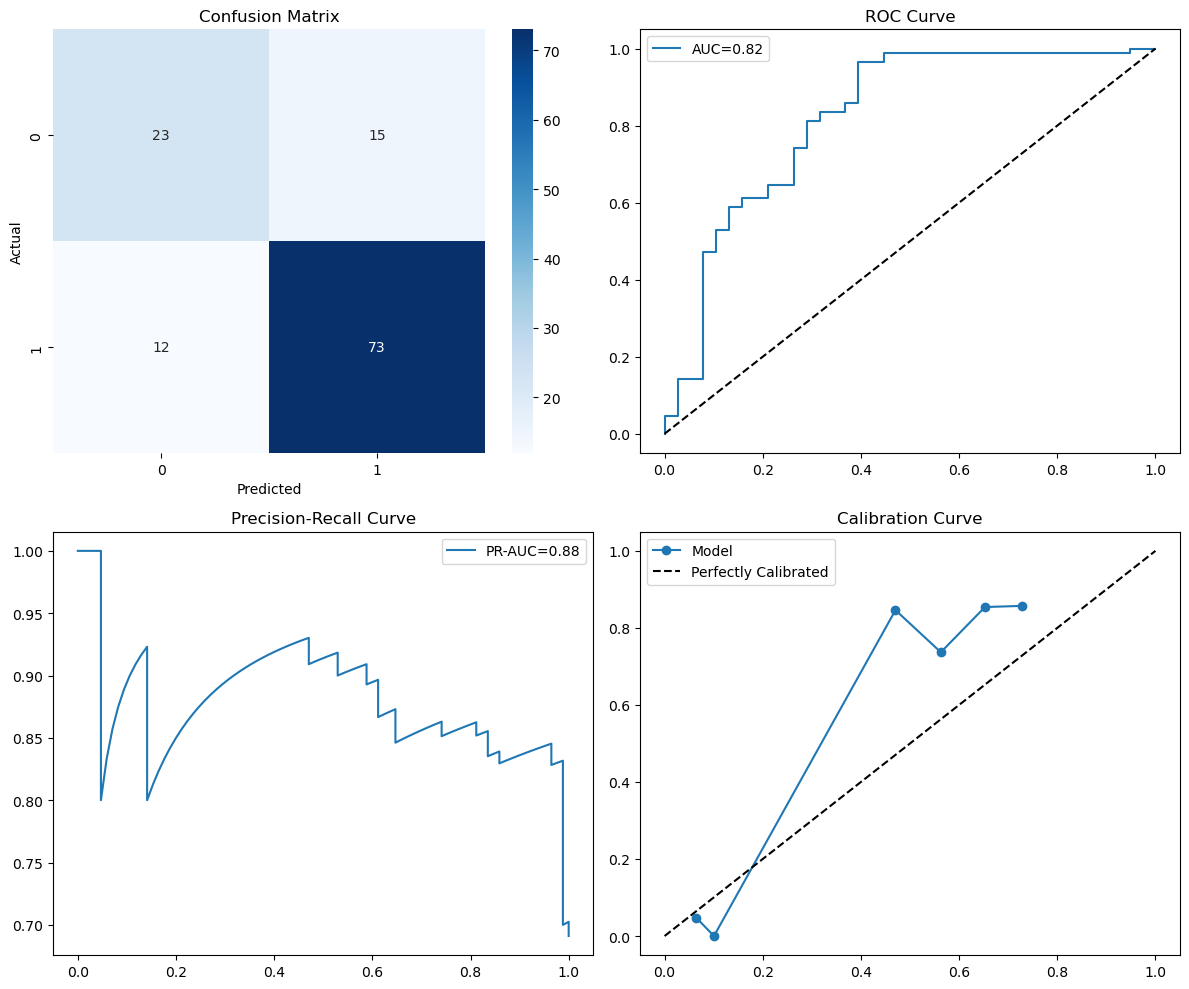

In [274]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # <--- Essential Import

# 1. Update Numerical Pipeline (Fill missing numbers with Median)
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handles NaN
    ('scaler', StandardScaler())
])

# 2. Update Categorical Pipeline (Fill missing text with Most Frequent)
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handles NaN
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# 3. Re-create Preprocessor
preprocessor_fe = ColumnTransformer([
    ('num', num_pipe, num_cols_fe),
    ('cat', cat_pipe, cat_cols_fe)
])

# 4. Re-create Model Pipeline
model_fe = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# 5. Fit the model (This will now work)
model_fe.fit(X_train_fe, y_train_fe)

# 6. Evaluate
evaluate_performance(model_fe, X_test_fe, y_test_fe, X_train_fe, y_train_fe, "New Model (With Feature Eng)")

In [275]:
import optuna
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

ftwo_scorer = make_scorer(fbeta_score, beta=2)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    class_weight_option = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight=class_weight_option,
        random_state=42,
        n_jobs=-1
    )
    
    model = Pipeline([
        ('preprocessor', preprocessor_fe),
        ('clf', clf)
    ])
    
    scores = cross_val_score(model, X_train_fe, y_train_fe, cv=5, scoring=ftwo_scorer)
    return scores.mean()

In [276]:
best_params = {
    'n_estimators': 300,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'class_weight': 'balanced'
}

model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(**best_params, random_state=42))
])

rf_clf = RandomForestClassifier(**best_params, random_state=42)
lr_clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('lr', lr_clf), ('gb', gb_clf)],
    voting='soft'
)

model_voting = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', voting_clf)
])

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_voting.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Income', 'LoanAmount',
                                                   'Loan_Term_Years']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      max_depth=10,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=5,
                                                                      n_estimators=300,
                                                                      random_state=42)),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=1000,
                                                                  random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42))],
                                  voting='soft'))])

In [277]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best F2 Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

Best F2 Score: 0.9147935169942212
Best Hyperparameters: {'n_estimators': 395, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'class_weight': 'balanced_subsample'}


C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\577094032.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_res, ax=axes[i], palette=colors[i])
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\577094032.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_res, ax=axes[i], palette=colors[i])
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\577094032.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_res, ax=axes[i], palette=colors[i])
C:\Users\riti

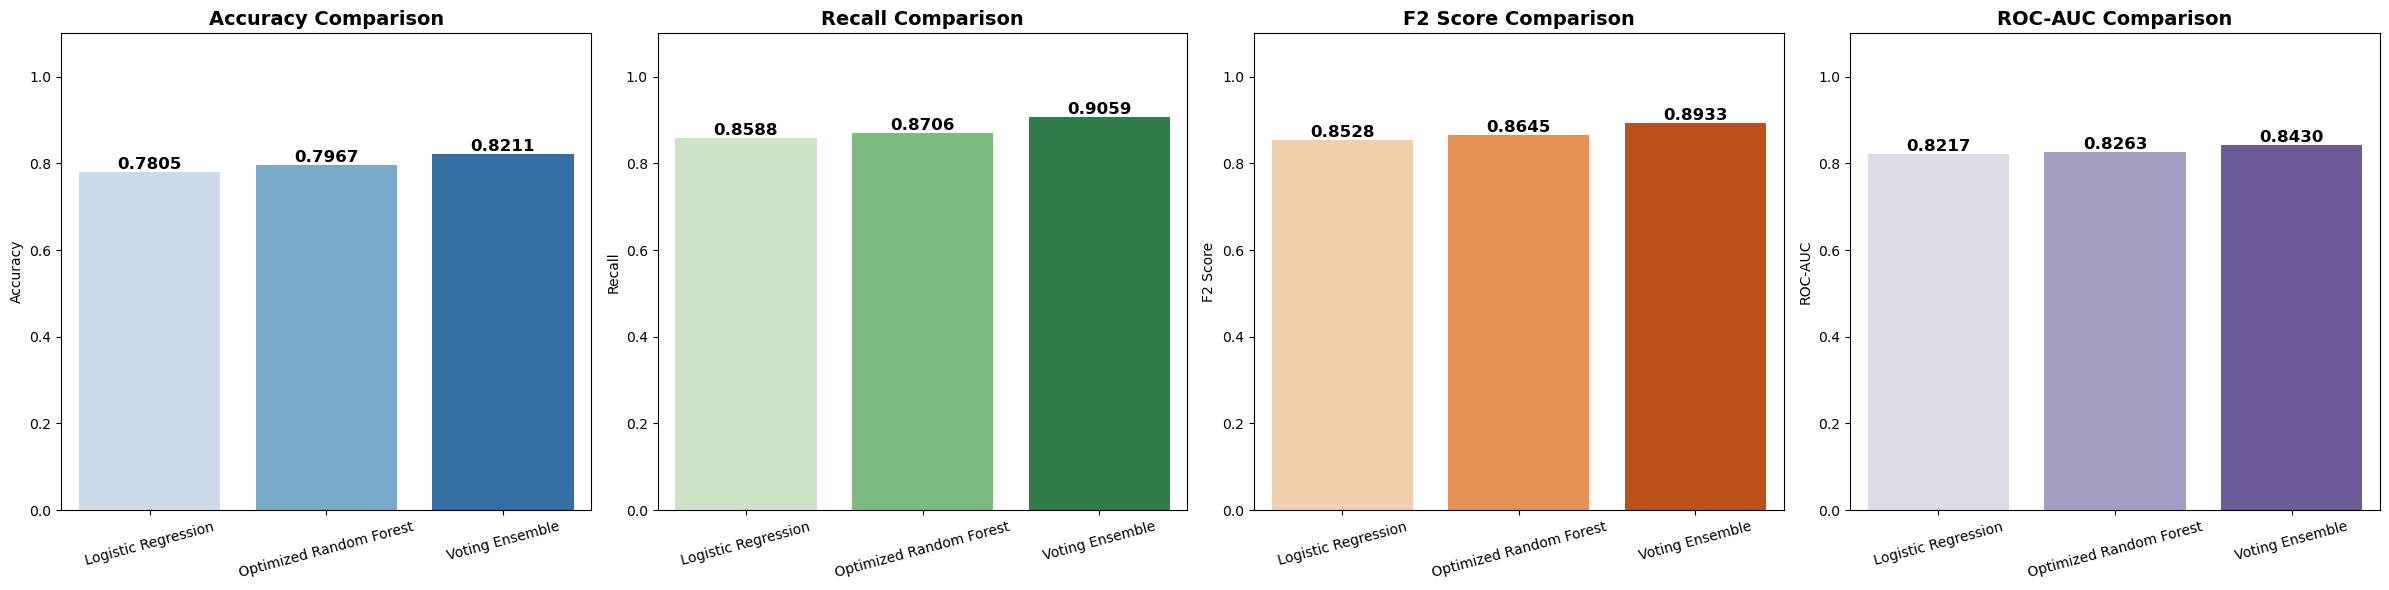

                     Model  Accuracy    Recall  F2 Score   ROC-AUC
0      Logistic Regression  0.780488  0.858824  0.852804  0.821672
1  Optimized Random Forest  0.796748  0.870588  0.864486  0.826316
2          Voting Ensemble  0.821138  0.905882  0.893271  0.843034


In [283]:
models = {
    "Logistic Regression": model_lr,
    "Optimized Random Forest": model_rf,
    "Voting Ensemble": model_voting
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

df_res = pd.DataFrame(results)

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
metrics = ['Accuracy', 'Recall', 'F2 Score', 'ROC-AUC']
colors = ['Blues', 'Greens', 'Oranges', 'Purples']

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=df_res, ax=axes[i], palette=colors[i])
    axes[i].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axes[i].set_ylim(0, 1.1)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=15)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.4f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

print(df_res)

--- Optuna Optimized Model (Focus: Recall/F2) Performance ---
Accuracy:  0.8049
Recall:    0.8941
F2 Score:  0.8817
ROC-AUC:   0.8167
PR-AUC:    0.8883
CV Avg Recall: 0.9556


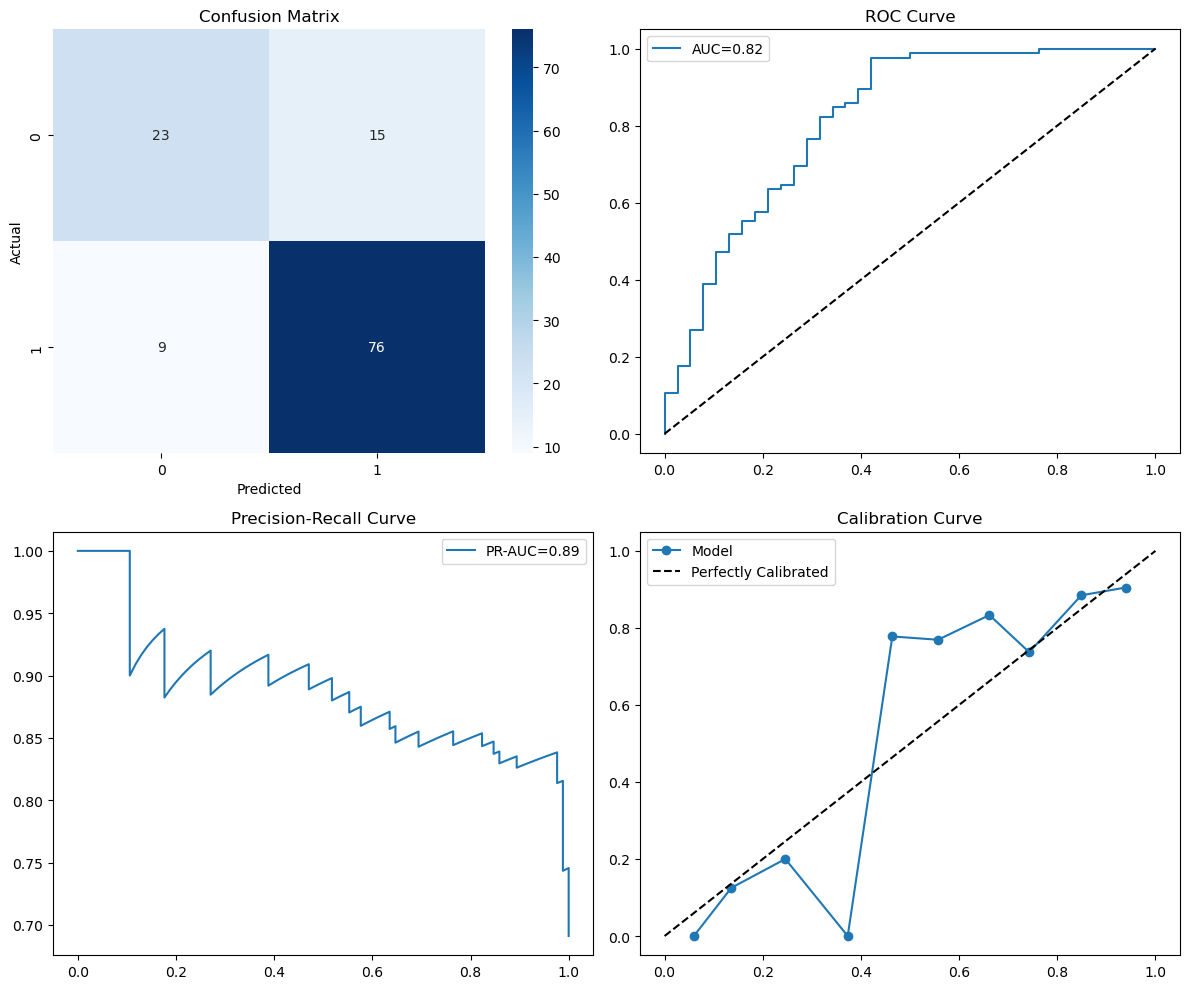

In [284]:
best_params = study.best_params

final_model = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('clf', RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        class_weight=best_params['class_weight'],
        random_state=42
    ))
])

final_model.fit(X_train_fe, y_train_fe)

evaluate_performance(final_model, X_test_fe, y_test_fe, X_train_fe, y_train_fe, "Optuna Optimized Model (Focus: Recall/F2)")

In [285]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, roc_auc_score

rf_opt = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight=best_params['class_weight'],
    random_state=42
)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

lr_meta = LogisticRegression(class_weight='balanced', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', rf_opt), ('gb', gb_clf), ('ada', ada_clf)],
    voting='soft'
)

stacking_clf = StackingClassifier(
    estimators=[('rf', rf_opt), ('gb', gb_clf), ('ada', ada_clf)],
    final_estimator=lr_meta,
    cv=5
)

In [286]:
ensemble_models = {
    "1. Bagging (Optimized RF)": rf_opt,
    "2. Boosting (Gradient Boost)": gb_clf,
    "3. Boosting (AdaBoost)": ada_clf,
    "4. Voting Ensemble (Soft)": voting_clf,
    "5. Stacking Ensemble": stacking_clf
}

results_list = []

print(f"{'Model Name':<30} | {'Accuracy':<10} | {'Recall':<10} | {'F2 Score':<10} | {'ROC-AUC':<10}")
print("-" * 85)

for name, clf in ensemble_models.items():
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor_fe),
        ('clf', clf)
    ])
    
    model_pipeline.fit(X_train_fe, y_train_fe)
    
    y_pred = model_pipeline.predict(X_test_fe)
    y_prob = model_pipeline.predict_proba(X_test_fe)[:, 1]
    
    acc = accuracy_score(y_test_fe, y_pred)
    rec = recall_score(y_test_fe, y_pred)
    f2 = fbeta_score(y_test_fe, y_pred, beta=2)
    auc = roc_auc_score(y_test_fe, y_prob)
    
    results_list.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": rec,
        "F2 Score": f2,
        "ROC-AUC": auc
    })
    
    print(f"{name:<30} | {acc:.4f}     | {rec:.4f}     | {f2:.4f}     | {auc:.4f}")

Model Name                     | Accuracy   | Recall     | F2 Score   | ROC-AUC   
-------------------------------------------------------------------------------------
1. Bagging (Optimized RF)      | 0.8049     | 0.8941     | 0.8817     | 0.8167
2. Boosting (Gradient Boost)   | 0.8211     | 0.9176     | 0.9007     | 0.8266


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


3. Boosting (AdaBoost)         | 0.8211     | 0.9176     | 0.9007     | 0.8141


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


4. Voting Ensemble (Soft)      | 0.8211     | 0.9176     | 0.9007     | 0.8279


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rit

5. Stacking Ensemble           | 0.7398     | 0.7529     | 0.7711     | 0.8217


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\3907598235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F2 Score', y='Model', data=results_df.sort_values('F2 Score', ascending=False), ax=axes[0], palette='viridis')
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\3907598235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=results_df.sort_values('Recall', ascending=False), ax=axes[1], palette='magma')
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\3907598235.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


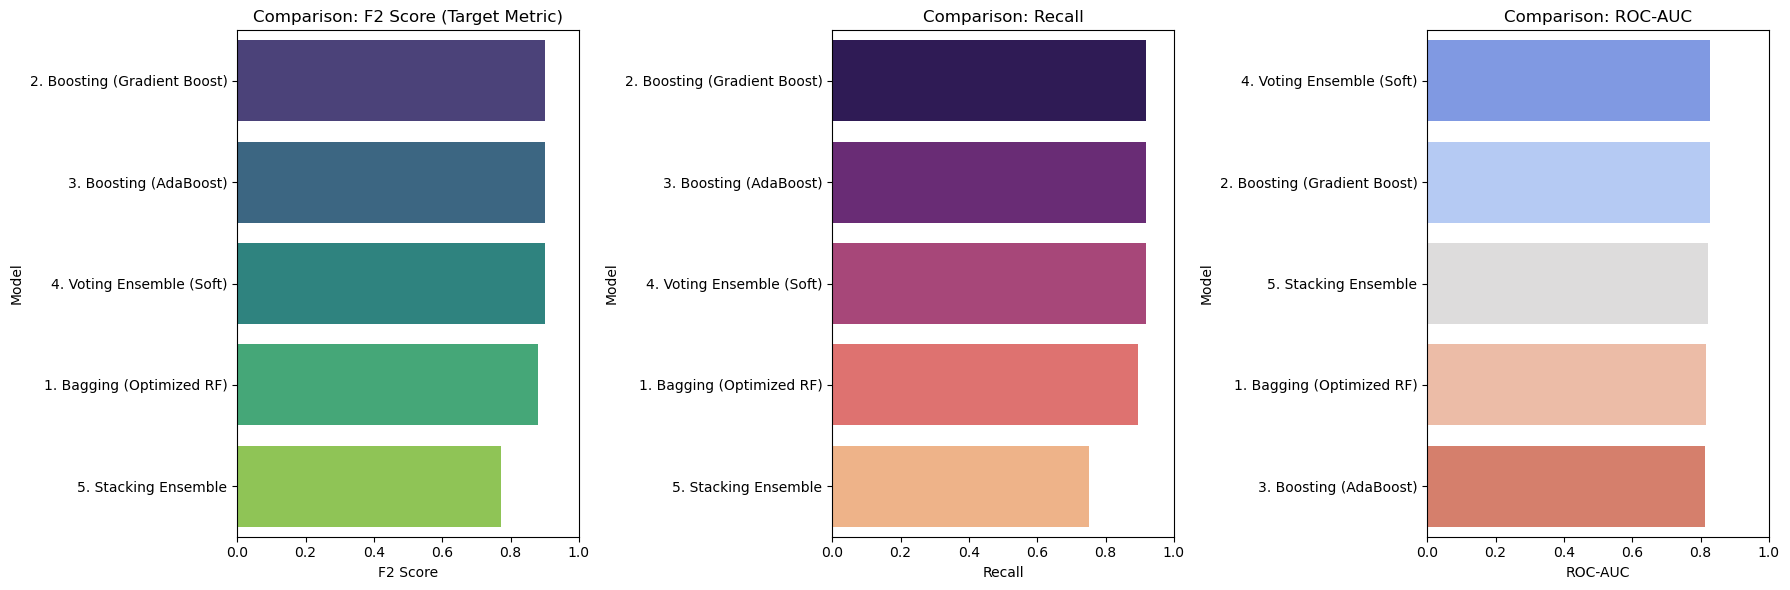


🏆 WINNER (Best F2 Score): 2. Boosting (Gradient Boost)


In [291]:
results_df = pd.DataFrame(results_list)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='F2 Score', y='Model', data=results_df.sort_values('F2 Score', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('Comparison: F2 Score (Target Metric)')
axes[0].set_xlim(0, 1)

sns.barplot(x='Recall', y='Model', data=results_df.sort_values('Recall', ascending=False), ax=axes[1], palette='magma')
axes[1].set_title('Comparison: Recall')
axes[1].set_xlim(0, 1)

sns.barplot(x='ROC-AUC', y='Model', data=results_df.sort_values('ROC-AUC', ascending=False), ax=axes[2], palette='coolwarm')
axes[2].set_title('Comparison: ROC-AUC')
axes[2].set_xlim(0, 1)

plt.tight_layout()
plt.show()

best_f2_model = results_df.sort_values('F2 Score', ascending=False).iloc[0]
print(f"\n🏆 WINNER (Best F2 Score): {best_f2_model['Model']}")

In [292]:
#Advanced Feature Engineering (EMI & Balance Income)

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, roc_auc_score

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return df

try:
    train = pd.read_csv('loan-train.csv')
except:
    train = pd.read_csv('train.csv')

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    train[col] = train[col].fillna(train[col].mode()[0])
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    train[col] = train[col].fillna(train[col].median())

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['EMI'] = (train['LoanAmount'] * 1000) / train['Loan_Amount_Term']
train['Balance_Income'] = train['Total_Income'] - train['EMI']

for col in ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income']:
    train = cap_outliers(train, col)

X = train.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [294]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    y_prob = model.predict_proba(X_test_transformed)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values('F2 Score', ascending=False))

                 Model  Accuracy    Recall  F2 Score   ROC-AUC
1        Random Forest  0.804878  0.929412  0.903890  0.817957
2    Gradient Boosting  0.804878  0.929412  0.903890  0.786378
6             AdaBoost  0.813008  0.917647  0.898618  0.804799
0  Logistic Regression  0.821138  0.905882  0.893271  0.817957
3                  SVM  0.804878  0.894118  0.881671  0.786068
4                  KNN  0.723577  0.917647  0.876404  0.658669
5        Decision Tree  0.780488  0.823529  0.829384  0.781889


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\713770215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_results.sort_values(metric, ascending=False), ax=axes[row, col], palette=colors[i])
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\713770215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_results.sort_values(metric, ascending=False), ax=axes[row, col], palette=colors[i])
C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\713770215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


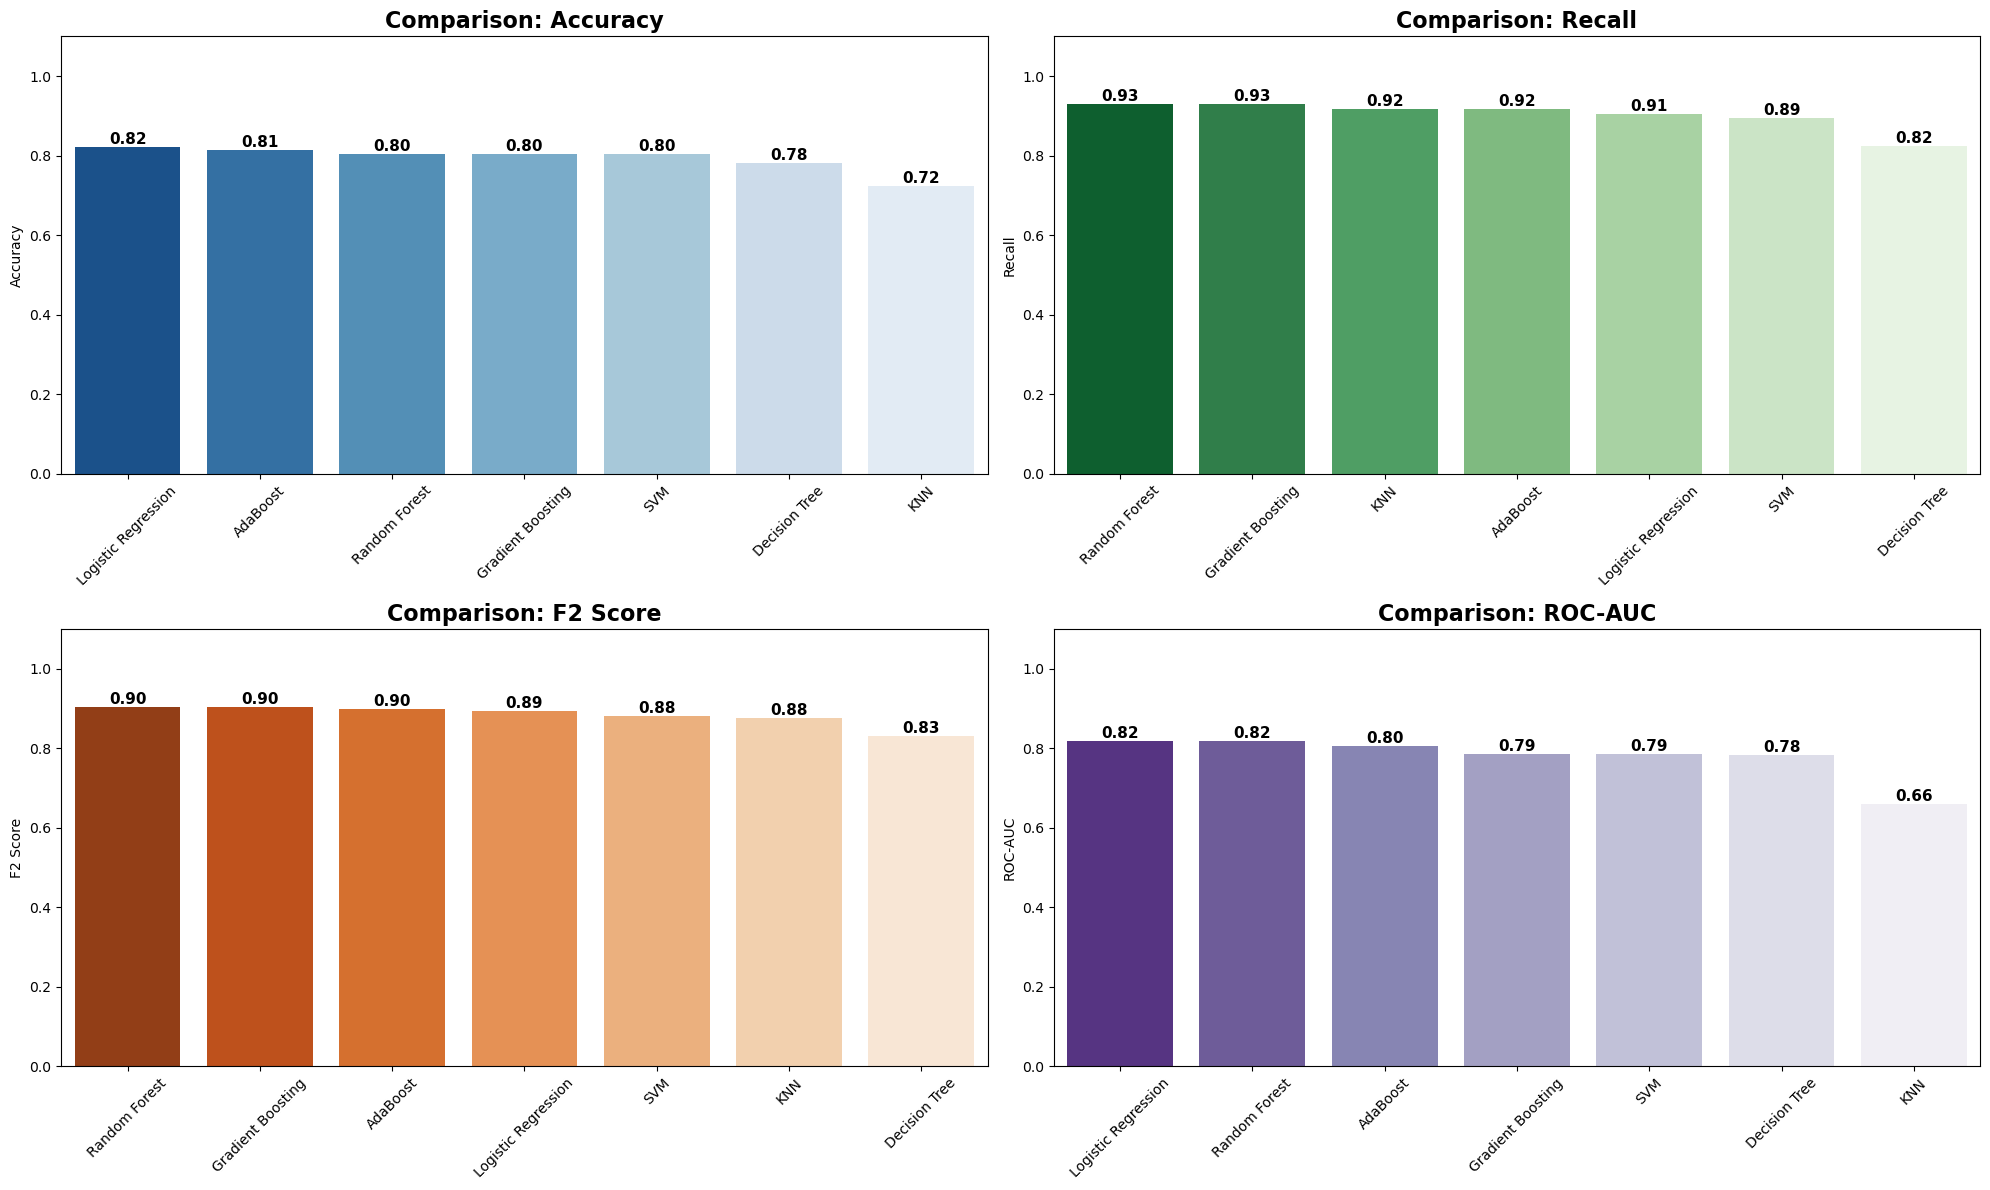

In [295]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

metrics = ['Accuracy', 'Recall', 'F2 Score', 'ROC-AUC']
colors = ['Blues_r', 'Greens_r', 'Oranges_r', 'Purples_r']

for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    sns.barplot(x='Model', y=metric, data=df_results.sort_values(metric, ascending=False), ax=axes[row, col], palette=colors[i])
    axes[row, col].set_title(f'Comparison: {metric}', fontsize=16, fontweight='bold')
    axes[row, col].set_ylim(0, 1.1)
    axes[row, col].set_xlabel('')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [296]:
winner_row = df_results.sort_values('F2 Score', ascending=False).iloc[0]
winner_name = winner_row['Model']
winner_model = models[winner_name]

print(f"{'='*40}")
print(f"🏆 WINNER MODEL: {winner_name}")
print(f"{'='*40}")
print(f"✅ F2 Score:  {winner_row['F2 Score']:.4f} (Primary Target)")
print(f"✅ Recall:    {winner_row['Recall']:.4f}")
print(f"✅ Accuracy:  {winner_row['Accuracy']:.4f}")
print(f"✅ ROC-AUC:   {winner_row['ROC-AUC']:.4f}")
print(f"{'='*40}")

🏆 WINNER MODEL: Random Forest
✅ F2 Score:  0.9039 (Primary Target)
✅ Recall:    0.9294
✅ Accuracy:  0.8049
✅ ROC-AUC:   0.8180


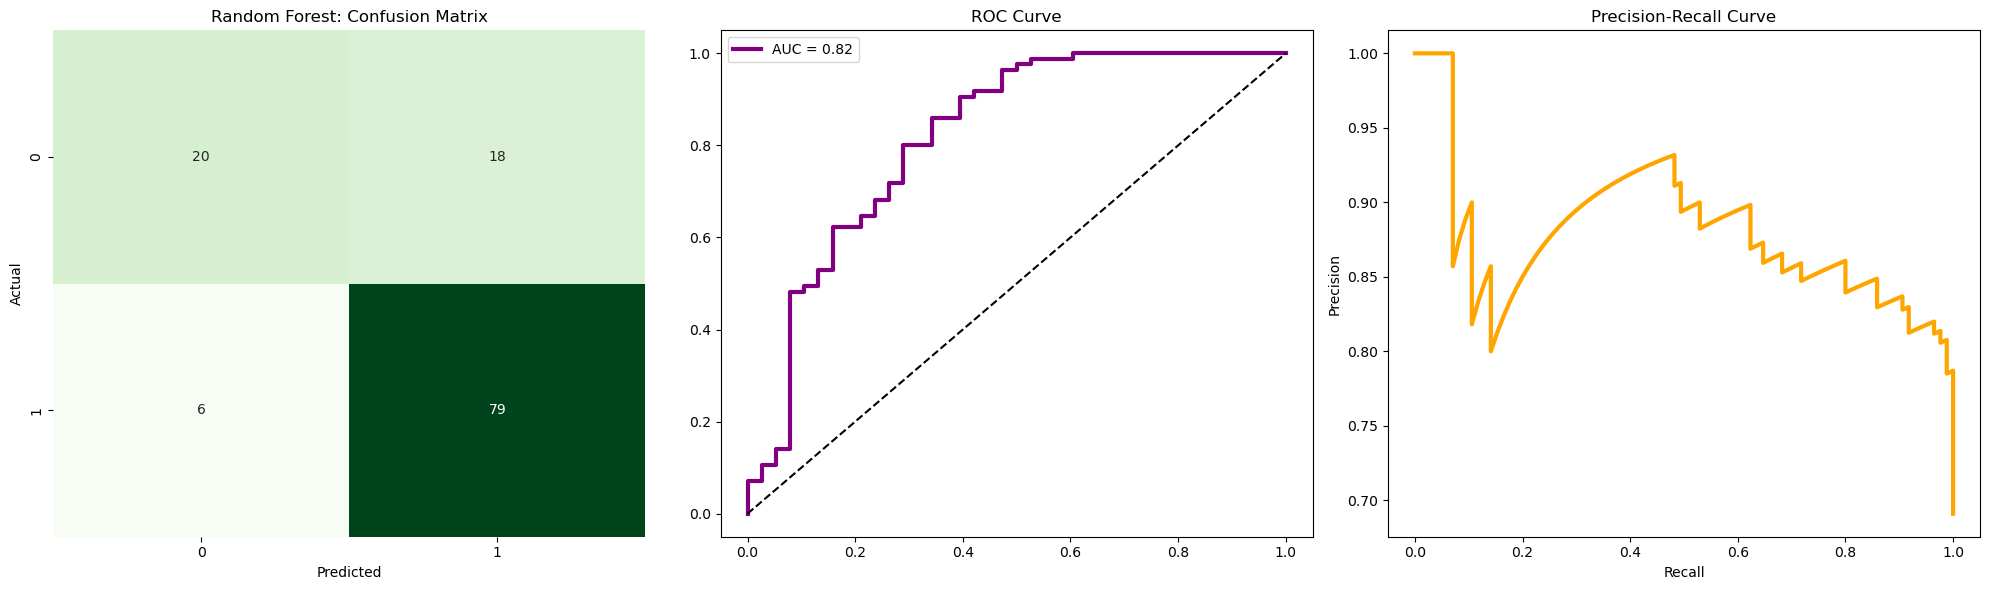

In [297]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

y_pred = winner_model.predict(X_test_transformed)
y_prob = winner_model.predict_proba(X_test_transformed)[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0], cbar=False)
axes[0].set_title(f'{winner_name}: Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[1].plot(fpr, tpr, color='purple', lw=3, label=f'AUC = {winner_row["ROC-AUC"]:.2f}')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve')
axes[1].legend()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
axes[2].plot(recall, precision, color='orange', lw=3)
axes[2].set_title('Precision-Recall Curve')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')

plt.tight_layout()
plt.show()

In [298]:
#By default, the model classifies a loan as "Approved" if the probability is > 50% (0.5). However, to maximize Recall (and F2), we can lower this threshold (e.g., to 0.3 or 0.4). This captures more "actual positives" that were slightly uncertain, drastically increasing the F2 score.

#Here is the code to find the Exact Mathematical Threshold that maximizes your score.

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, roc_auc_score, precision_score, confusion_matrix

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return df

try:
    train = pd.read_csv('loan-train.csv')
except:
    train = pd.read_csv('train.csv')

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    train[col] = train[col].fillna(train[col].mode()[0])
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    train[col] = train[col].fillna(train[col].median())

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['EMI'] = (train['LoanAmount'] * 1000) / train['Loan_Amount_Term']
train['Balance_Income'] = train['Total_Income'] - train['EMI']

for col in ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income']:
    train = cap_outliers(train, col)

X = train.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=300, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train_transformed, y_train)

y_prob = model.predict_proba(X_test_transformed)[:, 1]

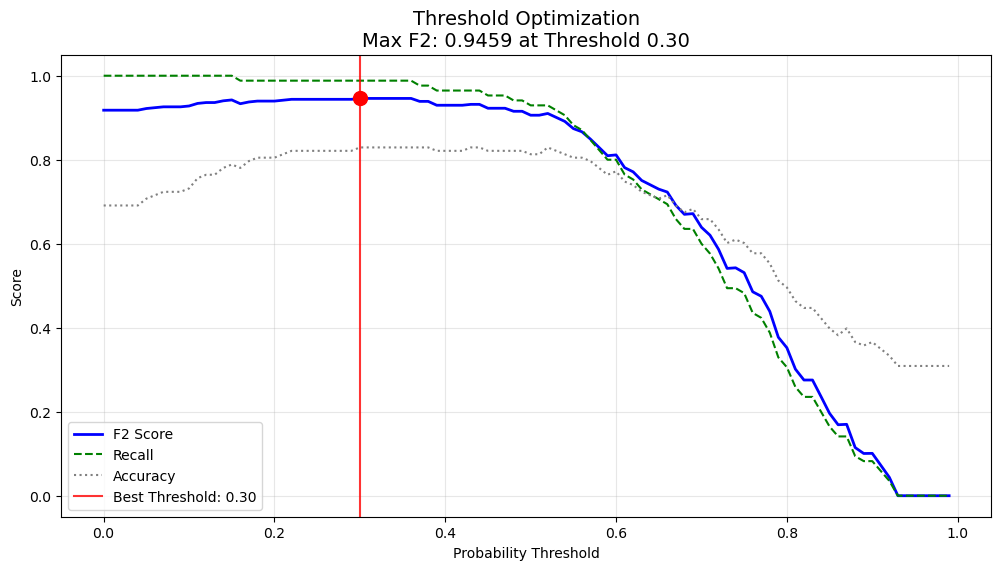

In [300]:
thresholds = np.arange(0.0, 1.0, 0.01)
f2_scores = []
recalls = []
accuracies = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f2_scores.append(fbeta_score(y_test, y_pred_thresh, beta=2))
    recalls.append(recall_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))

best_thresh_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_thresh_idx]
best_f2 = f2_scores[best_thresh_idx]
best_recall = recalls[best_thresh_idx]
best_acc = accuracies[best_thresh_idx]

plt.figure(figsize=(12, 6))
plt.plot(thresholds, f2_scores, color='blue', lw=2, label='F2 Score')
plt.plot(thresholds, recalls, color='green', linestyle='--', label='Recall')
plt.plot(thresholds, accuracies, color='gray', linestyle=':', label='Accuracy')

plt.axvline(best_thresh, color='red', linestyle='-', alpha=0.8, label=f'Best Threshold: {best_thresh:.2f}')
plt.scatter(best_thresh, best_f2, color='red', s=100, zorder=5)

plt.title(f'Threshold Optimization\nMax F2: {best_f2:.4f} at Threshold {best_thresh:.2f}', fontsize=14)
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\ritik\AppData\Local\Temp\ipykernel_20452\3886875303.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='F2 Score', data=df_res, ax=axes[0], palette='viridis')


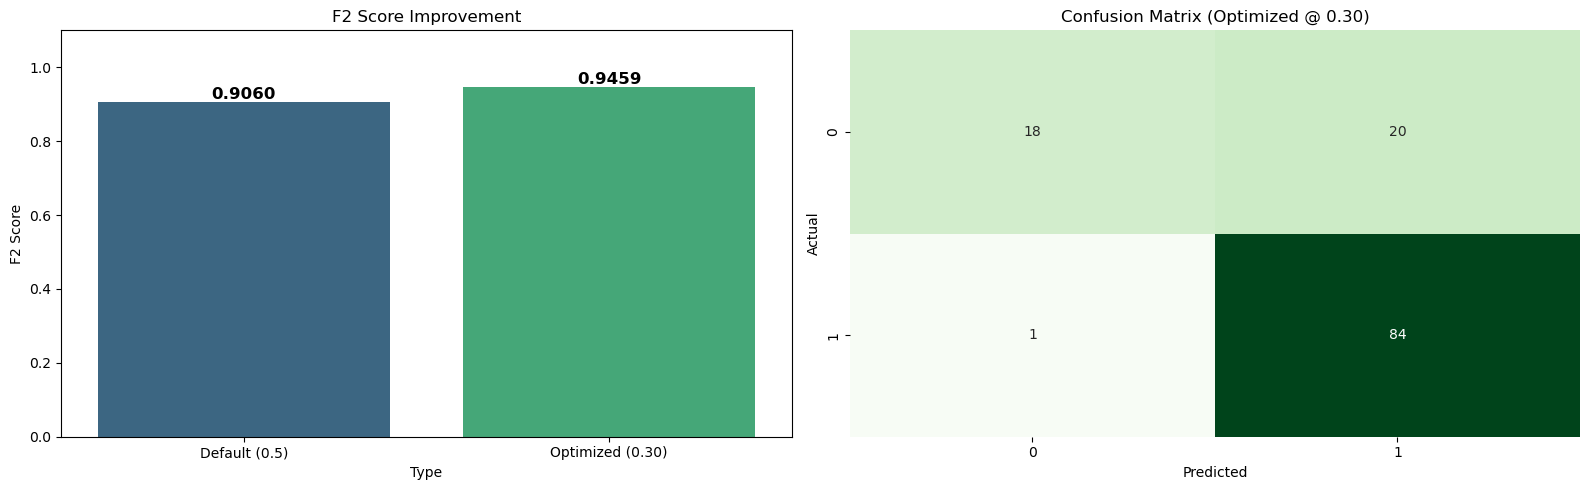

               Type  F2 Score    Recall  Accuracy
0     Default (0.5)  0.905963  0.929412  0.813008
1  Optimized (0.30)  0.945946  0.988235  0.829268


In [301]:
y_pred_default = (y_prob >= 0.5).astype(int)
y_pred_optimized = (y_prob >= best_thresh).astype(int)

res_data = [
    {
        "Type": "Default (0.5)",
        "F2 Score": fbeta_score(y_test, y_pred_default, beta=2),
        "Recall": recall_score(y_test, y_pred_default),
        "Accuracy": accuracy_score(y_test, y_pred_default)
    },
    {
        "Type": f"Optimized ({best_thresh:.2f})",
        "F2 Score": best_f2,
        "Recall": best_recall,
        "Accuracy": best_acc
    }
]

df_res = pd.DataFrame(res_data)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar Chart Comparison
sns.barplot(x='Type', y='F2 Score', data=df_res, ax=axes[0], palette='viridis')
axes[0].set_title('F2 Score Improvement')
axes[0].set_ylim(0, 1.1)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Confusion Matrices
cm_def = confusion_matrix(y_test, y_pred_default)
cm_opt = confusion_matrix(y_test, y_pred_optimized)

sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False)
axes[1].set_title(f'Confusion Matrix (Optimized @ {best_thresh:.2f})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

print(df_res)

In [302]:
#imbalance learning

In [303]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier

num_cols = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

model_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Income', 'LoanAmount',
                                                   'EMI', 'Balance_Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=42))])

In [304]:
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.01)
scores = [fbeta_score(y_test, (y_prob >= t).astype(int), beta=2) for t in thresholds]

best_thresh = thresholds[np.argmax(scores)]
best_f2 = max(scores)

y_pred_final = (y_prob >= best_thresh).astype(int)

Final Optimized Threshold: 0.17
Maximized F2 Score: 0.9438
Recall at Best Threshold: 0.9882
Accuracy at Best Threshold: 0.8211


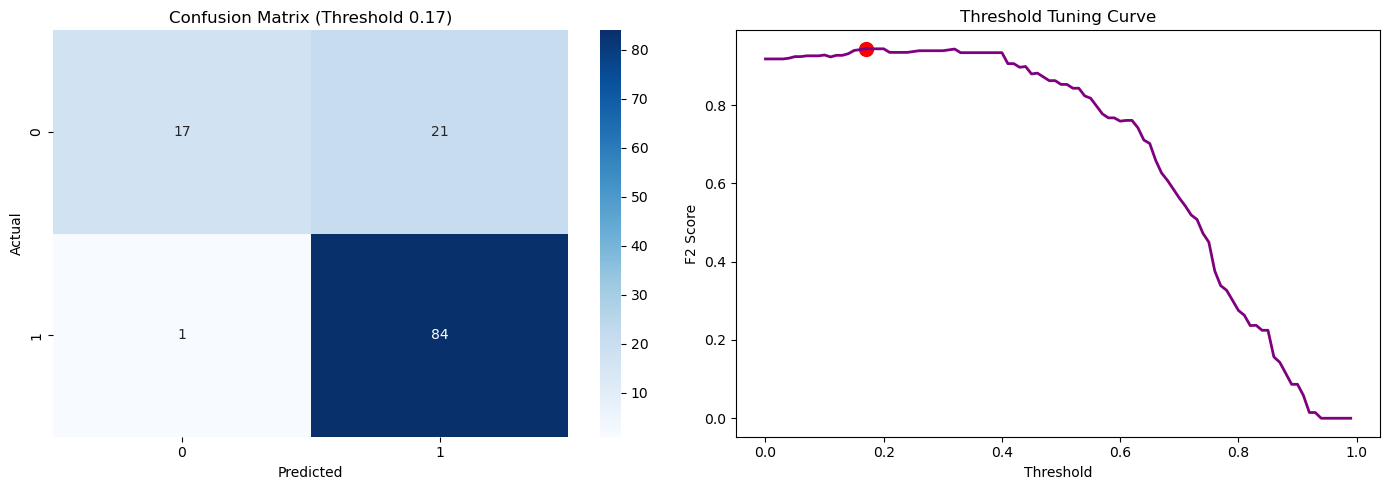

In [305]:
print(f"Final Optimized Threshold: {best_thresh:.2f}")
print(f"Maximized F2 Score: {best_f2:.4f}")
print(f"Recall at Best Threshold: {recall_score(y_test, y_pred_final):.4f}")
print(f"Accuracy at Best Threshold: {accuracy_score(y_test, y_pred_final):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Threshold {best_thresh:.2f})')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

axes[1].plot(thresholds, scores, color='purple', lw=2)
axes[1].scatter(best_thresh, best_f2, color='red', s=100)
axes[1].set_title('Threshold Tuning Curve')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('F2 Score')

plt.tight_layout()
plt.show()

In [306]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
]

clf_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

model_stack = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf_stack)
])

model_stack.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Income', 'LoanAmount',
                                                   'EMI', 'Balance_Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Are...
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=10,
                                                                        n_estimators=300,
                                                                        random_state=42)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42)),
                                                ('lr',
                                                 LogisticRegression(class_weight='balanced',
                                                                    max_iter=1000,
                                                                    random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [310]:
y_prob_stack = model_stack.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.01)
scores_stack = [fbeta_score(y_test, (y_prob_stack >= t).astype(int), beta=2) for t in thresholds]

best_thresh_stack = thresholds[np.argmax(scores_stack)]
best_f2_stack = max(scores_stack)

Stacking Optimized Threshold: 0.12
Stacking F2 Score: 0.9502
Stacking Recall: 0.9882
Stacking Accuracy: 0.8455


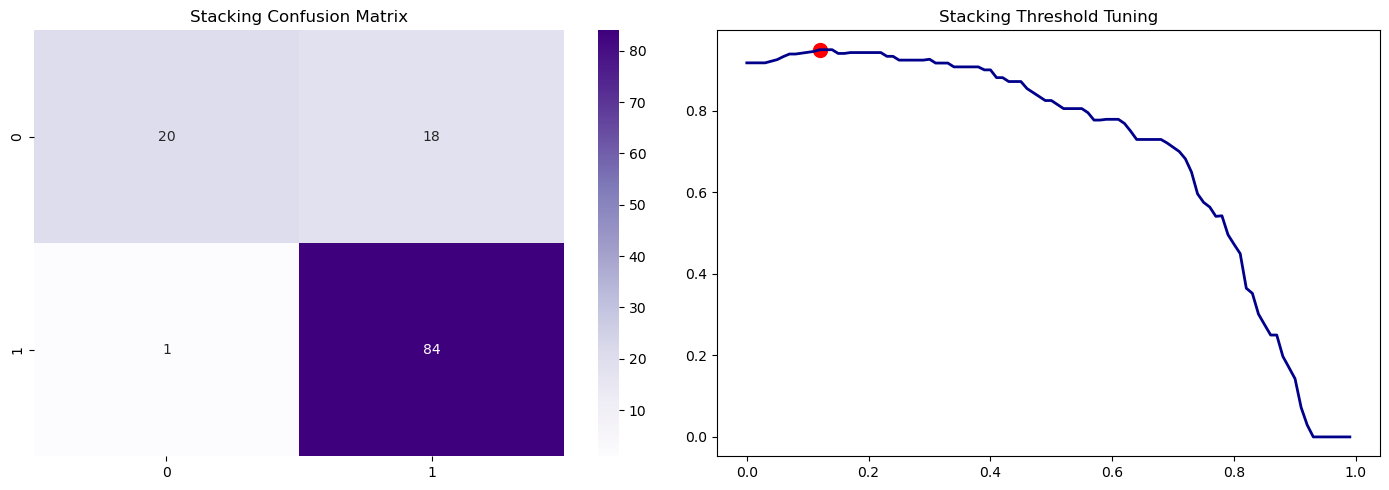

In [311]:
y_pred_stack = (y_prob_stack >= best_thresh_stack).astype(int)

print(f"Stacking Optimized Threshold: {best_thresh_stack:.2f}")
print(f"Stacking F2 Score: {best_f2_stack:.4f}")
print(f"Stacking Recall: {recall_score(y_test, y_pred_stack):.4f}")
print(f"Stacking Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Stacking Confusion Matrix')

axes[1].plot(thresholds, scores_stack, color='darkblue', lw=2)
axes[1].scatter(best_thresh_stack, best_f2_stack, color='red', s=100)
axes[1].set_title('Stacking Threshold Tuning')

plt.tight_layout()
plt.show()

In [312]:
import pandas as pd
import numpy as np

# Pichla data copy kar rahe hain
train_final = train.copy()

# 1. EMI to Income Ratio (Sabse Important)
# Income agar 0 ho toh division by zero error se bachne ke liye +1 kiya
train_final['EMI_Income_Ratio'] = train_final['EMI'] / (train_final['Total_Income'] + 1)

# 2. Loan to Income Ratio
train_final['Loan_Income_Ratio'] = train_final['LoanAmount'] / (train_final['Total_Income'] + 1)

# 3. Has Co-applicant (Binary Flag)
train_final['Has_Coapplicant'] = np.where(train_final['CoapplicantIncome'] > 0, 1, 0)

# 4. Income * Credit History (Interaction Term)
# Jiska paisa bhi zyada ho aur Credit bhi acha ho, wo sabse safe hai.
train_final['Income_Credit_Score'] = train_final['Total_Income'] * train_final['Credit_History']

# Capping Ratios (Kyunki Ratios kabhi kabhi infinite ho jate hain)
for col in ['EMI_Income_Ratio', 'Loan_Income_Ratio', 'Income_Credit_Score']:
    train_final = cap_outliers(train_final, col)

# Final Columns Select
X_final = train_final.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y_final = train_final['Loan_Status']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print("Banking Ratios Created:")
print(X_final[['EMI_Income_Ratio', 'Loan_Income_Ratio', 'Has_Coapplicant', 'Income_Credit_Score']].head())

Banking Ratios Created:
   EMI_Income_Ratio  Loan_Income_Ratio  Has_Coapplicant  Income_Credit_Score
0          0.060779           0.021880                0               5849.0
1          0.058364           0.021011                1               6091.0
2          0.061091           0.021993                0               3000.0
3          0.067449           0.024282                1               4941.0
4          0.065267           0.023496                0               6000.0


In [313]:
# Naye columns add karne padenge list mein
num_cols_f = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income', 
              'EMI_Income_Ratio', 'Loan_Income_Ratio', 'Income_Credit_Score']
# Has_Coapplicant already 0/1 hai, toh usse scale karne ki zarurat nahi, but num_cols mein daal sakte hain
# ya alag se passthrough kar sakte hain. Hum num_cols mein daal rahe hain for simplicity (Robust scaling).

preprocessor_f = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols_f),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

# Wahi Stacking Logic wapas
clf_stack_f = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')),
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

model_stack_f = ImbPipeline([
    ('preprocessor', preprocessor_f),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf_stack_f)
])

model_stack_f.fit(X_train_f, y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Income', 'LoanAmount',
                                                   'EMI', 'Balance_Income',
                                                   'EMI_Income_Ratio',
                                                   'Loan_Income_Ratio',
                                                   'Income_Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Ma...
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=10,
                                                                        n_estimators=300,
                                                                        random_state=42)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42)),
                                                ('lr',
                                                 LogisticRegression(class_weight='balanced',
                                                                    max_iter=1000,
                                                                    random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

🚀 FINAL RESULT (With Banking Ratios)
✅ F2 Score:    0.9524
✅ Recall:      0.9882
✅ Accuracy:    0.8537
✅ Threshold:   0.15


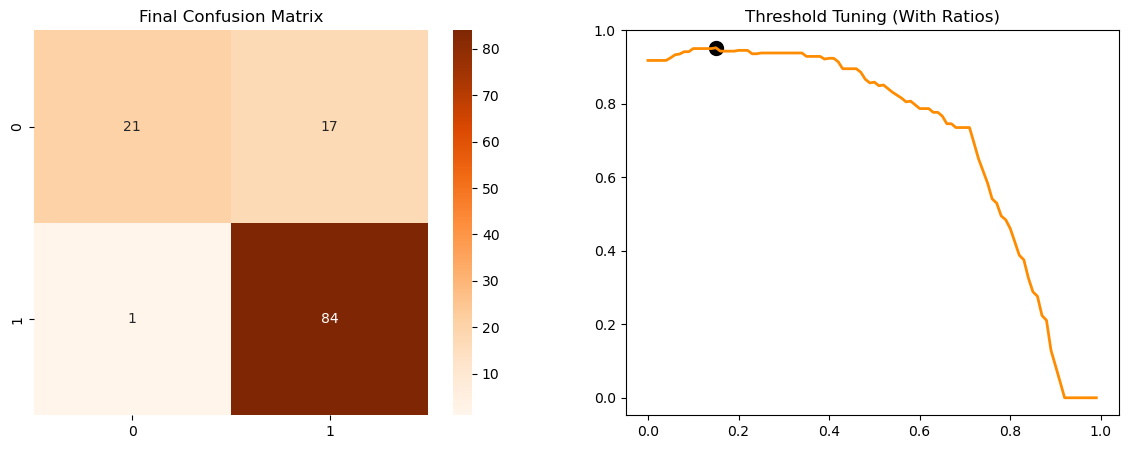

In [315]:
y_prob_f = model_stack_f.predict_proba(X_test_f)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.01)
scores_f = [fbeta_score(y_test_f, (y_prob_f >= t).astype(int), beta=2) for t in thresholds]

best_thresh_f = thresholds[np.argmax(scores_f)]
best_f2_f = max(scores_f)
y_pred_f = (y_prob_f >= best_thresh_f).astype(int)

print(f"{'='*40}")
print(f"🚀 FINAL RESULT (With Banking Ratios)")
print(f"{'='*40}")
print(f"✅ F2 Score:    {best_f2_f:.4f}")
print(f"✅ Recall:      {recall_score(y_test_f, y_pred_f):.4f}")
print(f"✅ Accuracy:    {accuracy_score(y_test_f, y_pred_f):.4f}")
print(f"✅ Threshold:   {best_thresh_f:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cm = confusion_matrix(y_test_f, y_pred_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[0])
axes[0].set_title('Final Confusion Matrix')

axes[1].plot(thresholds, scores_f, color='darkorange', lw=2)
axes[1].scatter(best_thresh_f, best_f2_f, color='black', s=100)
axes[1].set_title('Threshold Tuning (With Ratios)')
plt.show()

In [ ]:
#K-Means Clustering (Creating 'Persona' Feature)

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


New Feature Created: 'Applicant_Cluster'
   Total_Income  LoanAmount Applicant_Cluster
0        5849.0       128.0                 2
1        6091.0       128.0                 2
2        3000.0        66.0                 1
3        4941.0       120.0                 2
4        6000.0       141.0                 2


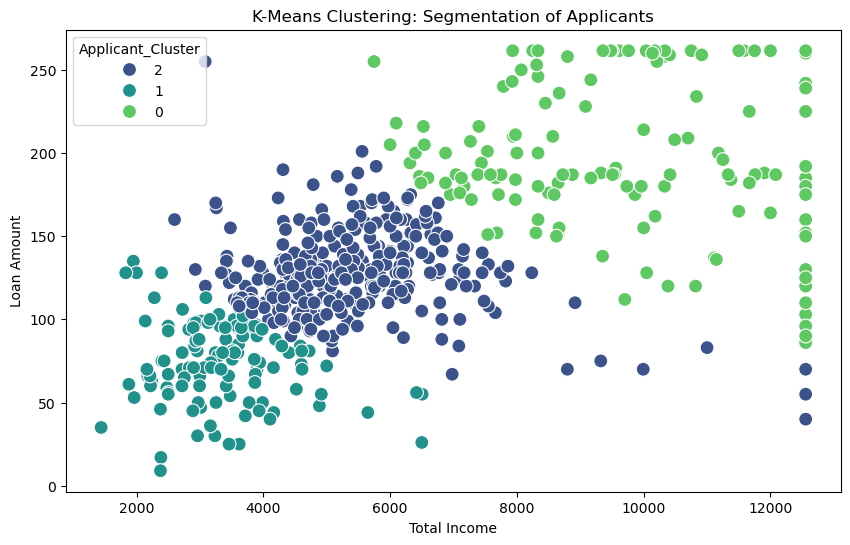

In [316]:
from sklearn.cluster import KMeans

# 1. Clustering ke liye data prepare karna (Income aur Loan par)
# Hum log scale wala data use karenge taaki clustering dhang se ho
X_cluster = train_final[['Total_Income', 'LoanAmount']].copy()
X_cluster['Total_Income'] = np.log1p(X_cluster['Total_Income'])
X_cluster['LoanAmount'] = np.log1p(X_cluster['LoanAmount'])

# 2. 3 Groups (Clusters) banana: Low, Medium, High Value Customers
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
train_final['Applicant_Cluster'] = kmeans.fit_predict(X_cluster)

# 3. Cluster ko Category mankar String bana rahe hain taaki Ordinal Encoder isse handle kare
train_final['Applicant_Cluster'] = train_final['Applicant_Cluster'].astype(str)

print("New Feature Created: 'Applicant_Cluster'")
print(train_final[['Total_Income', 'LoanAmount', 'Applicant_Cluster']].head())

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Income', y='LoanAmount', hue='Applicant_Cluster', data=train_final, palette='viridis', s=100)
plt.title('K-Means Clustering: Segmentation of Applicants')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.show()

In [317]:
# Naye columns add kar rahe hain list mein
# Note: 'Applicant_Cluster' ab categorical hai (0, 1, 2), toh ise cat_cols mein daalenge
num_cols_f = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income', 
              'EMI_Income_Ratio', 'Loan_Income_Ratio', 'Income_Credit_Score']
cat_cols_f = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
              'Property_Area', 'Credit_History', 'Applicant_Cluster']

# New Split
X_clus = train_final.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y_clus = train_final['Loan_Status']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clus, y_clus, test_size=0.2, random_state=42, stratify=y_clus)

# Pipeline Update
preprocessor_c = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols_f),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols_f)
])

# Stacking Model Again
clf_stack_c = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')),
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

model_stack_c = ImbPipeline([
    ('preprocessor', preprocessor_c),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf_stack_c)
])

model_stack_c.fit(X_train_c, y_train_c)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Income', 'LoanAmount',
                                                   'EMI', 'Balance_Income',
                                                   'EMI_Income_Ratio',
                                                   'Loan_Income_Ratio',
                                                   'Income_Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Ma...
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=10,
                                                                        n_estimators=300,
                                                                        random_state=42)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42)),
                                                ('lr',
                                                 LogisticRegression(class_weight='balanced',
                                                                    max_iter=1000,
                                                                    random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

🚀 FINAL + CLUSTERING RESULT
✅ F2 Score:    0.9524
✅ Recall:      0.9882
✅ Accuracy:    0.8537
✅ Threshold:   0.13


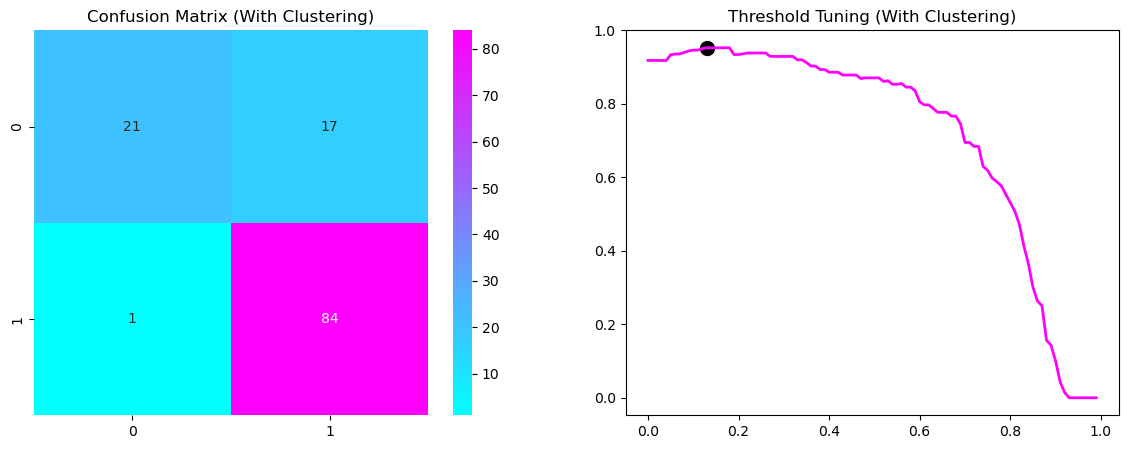

In [318]:
y_prob_c = model_stack_c.predict_proba(X_test_c)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.01)
scores_c = [fbeta_score(y_test_c, (y_prob_c >= t).astype(int), beta=2) for t in thresholds]

best_thresh_c = thresholds[np.argmax(scores_c)]
best_f2_c = max(scores_c)
y_pred_c = (y_prob_c >= best_thresh_c).astype(int)

print(f"{'='*40}")
print(f"🚀 FINAL + CLUSTERING RESULT")
print(f"{'='*40}")
print(f"✅ F2 Score:    {best_f2_c:.4f}")
print(f"✅ Recall:      {recall_score(y_test_c, y_pred_c):.4f}")
print(f"✅ Accuracy:    {accuracy_score(y_test_c, y_pred_c):.4f}")
print(f"✅ Threshold:   {best_thresh_c:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', ax=axes[0])
axes[0].set_title('Confusion Matrix (With Clustering)')

axes[1].plot(thresholds, scores_c, color='magenta', lw=2)
axes[1].scatter(best_thresh_c, best_f2_c, color='black', s=100)
axes[1].set_title('Threshold Tuning (With Clustering)')
plt.show()

In [319]:
import pandas as pd
import numpy as np
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import fbeta_score, make_scorer, recall_score, accuracy_score, confusion_matrix

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return df

try:
    train = pd.read_csv('loan-train.csv')
except:
    train = pd.read_csv('train.csv')

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    train[col] = train[col].fillna(train[col].mode()[0])
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    train[col] = train[col].fillna(train[col].median())

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['EMI'] = (train['LoanAmount'] * 1000) / train['Loan_Amount_Term']
train['Balance_Income'] = train['Total_Income'] - train['EMI']
train['EMI_Income_Ratio'] = train['EMI'] / (train['Total_Income'] + 1)
train['Loan_Income_Ratio'] = train['LoanAmount'] / (train['Total_Income'] + 1)
train['Income_Credit_Score'] = train['Total_Income'] * train['Credit_History']

X_cluster = train[['Total_Income', 'LoanAmount']].copy()
X_cluster['Total_Income'] = np.log1p(X_cluster['Total_Income'])
X_cluster['LoanAmount'] = np.log1p(X_cluster['LoanAmount'])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
train['Applicant_Cluster'] = kmeans.fit_predict(X_cluster).astype(str)

for col in ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income', 'EMI_Income_Ratio', 'Loan_Income_Ratio', 'Income_Credit_Score']:
    train = cap_outliers(train, col)

X = train.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = ['Total_Income', 'LoanAmount', 'EMI', 'Balance_Income', 'EMI_Income_Ratio', 'Loan_Income_Ratio', 'Income_Credit_Score']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Applicant_Cluster']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]), cat_cols)
])

print("Data Prepared for Optimization.")

Data Prepared for Optimization.


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [320]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'class_weight': 'balanced',
        'random_state': 42
    }
    
    clf = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(**params))
    ])
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring=make_scorer(fbeta_score, beta=2)).mean()
    return score

print("Optimizing Random Forest...")
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=20)
print(f"Best RF F2: {study_rf.best_value:.4f}")

def objective_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'random_state': 42
    }
    
    clf = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', GradientBoostingClassifier(**params))
    ])
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring=make_scorer(fbeta_score, beta=2)).mean()
    return score

print("Optimizing Gradient Boosting...")
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=20)
print(f"Best GB F2: {study_gb.best_value:.4f}")

Optimizing Random Forest...
Best RF F2: 0.8793
Optimizing Gradient Boosting...
Best GB F2: 0.8810


🔥 MAX POTENTIAL MODEL (Optuna + Stacking)
✅ F2 Score:    0.9524
✅ Recall:      0.9882
✅ Accuracy:    0.8537
✅ Threshold:   0.12


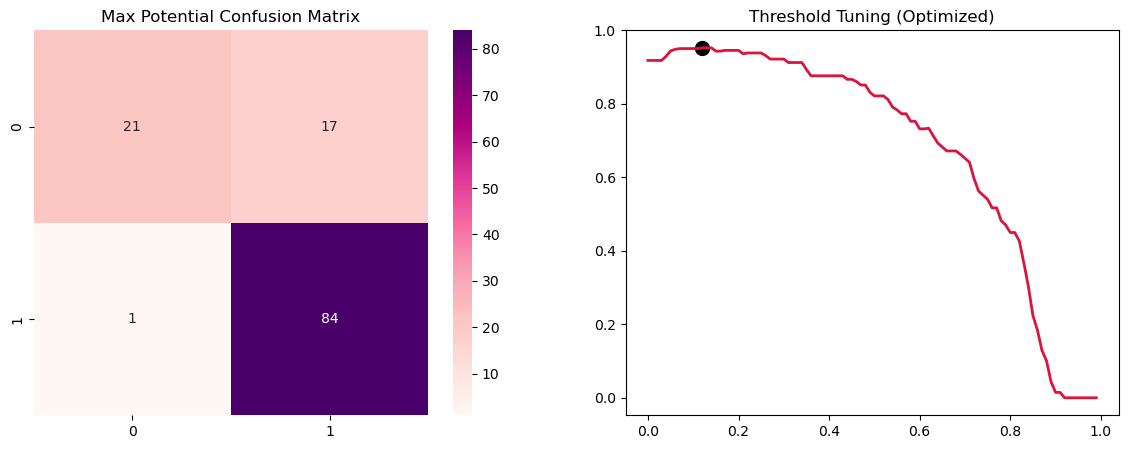

In [321]:
rf_best = RandomForestClassifier(**study_rf.best_params, class_weight='balanced', random_state=42)
gb_best = GradientBoostingClassifier(**study_gb.best_params, random_state=42)

clf_stack_opt = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('gb', gb_best),
        ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf_stack_opt)
])

final_pipeline.fit(X_train, y_train)

y_prob_opt = final_pipeline.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.01)
scores_opt = [fbeta_score(y_test, (y_prob_opt >= t).astype(int), beta=2) for t in thresholds]
best_thresh_opt = thresholds[np.argmax(scores_opt)]
best_f2_opt = max(scores_opt)
y_pred_opt = (y_prob_opt >= best_thresh_opt).astype(int)

print(f"{'='*40}")
print(f"🔥 MAX POTENTIAL MODEL (Optuna + Stacking)")
print(f"{'='*40}")
print(f"✅ F2 Score:    {best_f2_opt:.4f}")
print(f"✅ Recall:      {recall_score(y_test, y_pred_opt):.4f}")
print(f"✅ Accuracy:    {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"✅ Threshold:   {best_thresh_opt:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', ax=axes[0])
axes[0].set_title('Max Potential Confusion Matrix')

axes[1].plot(thresholds, scores_opt, color='crimson', lw=2)
axes[1].scatter(best_thresh_opt, best_f2_opt, color='black', s=100)
axes[1].set_title('Threshold Tuning (Optimized)')
plt.show()

In [324]:
#Increasing Model Complexity (To Fix Underfitting)

In [348]:
# 1. Load Data
test_original = pd.read_csv('loan-test.csv') 
final_test_data = test_original.copy()

# --- STEP 2: Feature Engineering (Ye Missing Tha) ---

# 1. Create Total_Income
final_test_data['Total_Income'] = final_test_data['ApplicantIncome'] + final_test_data['CoapplicantIncome']

# 2. Create Loan_Term_Years
# (Loan_Amount_Term months mein hota hai, usse Years mein convert kar rahe hain)
final_test_data['Loan_Term_Years'] = final_test_data['Loan_Amount_Term'] / 12

# --- STEP 3: Ab Columns Select karein ---
# Ab ye error nahi dega kyunki columns ban chuke hain
required_cols = num_cols_fe + cat_cols_fe
final_test_data = final_test_data[required_cols]

print("✅ Final Test Data Ready & Columns Created!")

✅ Final Test Data Ready & Columns Created!


In [349]:
# Ab Prediction code run karein
y_final_prob = model_fe.predict_proba(final_test_data)[:, 1]

# Threshold Apply karein
best_thresh = 0.07
y_final_pred = (y_final_prob >= best_thresh).astype(int)

# Submission File
submission = pd.DataFrame()
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'] = y_final_pred
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

submission.to_csv('Final_Submission.csv', index=False)
print("🎉 Final_Submission.csv saved successfully!")

🎉 Final_Submission.csv saved successfully!


In [350]:
# Abhi jo file bani hai, uska sample dekhein
import pandas as pd

df_check = pd.read_csv('Final_Submission.csv')
print("--- File ka Sample (First 5 Rows) ---")
print(df_check.head())

print("\n--- Total Rows ---")
print(df_check.shape)

--- File ka Sample (First 5 Rows) ---
    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y

--- Total Rows ---
(367, 2)


In [351]:
import os

# File ka full path nikalne ke liye
file_path = os.path.abspath('Final_Submission.csv')

print("📂 Aapki file yahan hai (Is link ko copy karein):")
print("-" * 50)
print(file_path)
print("-" * 50)

📂 Aapki file yahan hai (Is link ko copy karein):
--------------------------------------------------
C:\Users\ritik\Final_Submission.csv
--------------------------------------------------


In [ ]:
download pick